## **RADIUS NEIGHBORS CLASSIFIER**

Es una extensión del algoritmo de k-Nearest Neighbors, que hace predicciones utilizando todas las instancias en el radio de una nueva instancia en lugar de los k-vecinos más cercanos.

Como tal, el enfoque basado en el radio para seleccionar vecinos es más apropiado para datos dispersos, evitando que las instancias que están muy lejos en el espacio de características (atributos) contribuyan a la predicción.

- El radio es definido por el usuario y por lo general se asume que los valores del conjunto de entrenamiento estan en un rango de 0 a 1 (Normalizados).

_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html_

![ml_12.jpg](attachment:ml_12.jpg)


- Este enfoque **es apropiado para aquellos conjuntos de datos donde es deseable que la contribución de los vecinos sea proporcional a la densidad de instancias** en el espacio de características (atributos).


- Dado un radio fijo, **las regiones densas del espacio de características (atributos) contribuirán con más información y las regiones dispersas contribuirán con menos información**.


- Este último caso es el más deseable y **evita que las instancias muy lejanas en el espacio de características (atributos) de la nueva instancia contribuyan a la predicción**.


- Como tal, el **`RadiusNeighborsClassifier()`** puede ser **más apropiado** para problemas de predicción donde hay **regiones escasas del espacio de características (atributos)**.


- **Si los datos han sido normalizados, el radio debe de estar entre 0 y sqrt(n).**

### **LIBRERÍAS NECESARIAS**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Separación Train y Test
from sklearn.model_selection import train_test_split

# Modelo
from sklearn.neighbors import RadiusNeighborsClassifier

# Métricas
from sklearn.metrics import accuracy_score

In [13]:
df = pd.read_csv("../Data/iris.csv")

### **SEPARACIÓN TRAIN Y TEST**

In [14]:
X = df.drop("Clase", axis = 1)

y = df["Clase"]

X.shape, y.shape

((150, 4), (150,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify= y)

# El parámetro stratify nos ayuda a que la separación de datos en train y test sigan la misma distribución a partir
# de la columna indicada.
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (120, 4), y_train: (120,)
X_test: (30, 4),  y_test: (30,)


### **PREPROCESAMIENTO DE DATOS**

In [16]:
# labelEncoder sobre la columna "Clase" para transformarla a numerica
clase_LabelEncoder = LabelEncoder()
clase_train = clase_LabelEncoder.fit_transform(y_train) # En este ejemplo estoy usando fit_transform()
y_train = clase_train
clase_test = clase_LabelEncoder.transform(y_test)
y_test = clase_test

### **NORMALIZACIÓN DE DATOS**

In [17]:
scaler = MinMaxScaler()

x_train_scaler = scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# No hace falta escalar la y porque son clases

### **MODELO Y PREDICCIONES**

In [18]:
model = RadiusNeighborsClassifier(radius = 0.5)
model.fit(X_train_scaler, y_train)
yhat = model.predict(X_test_scaler)

### **MÉTRICAS**

In [19]:
print(f"Accuracy: {accuracy_score(y_test, yhat)}")

Accuracy: 0.8666666666666667


In [20]:
# Con los datos de test normalizados
nombres_columnas = df["Clase"].unique().tolist()
# .predict_proba() retorna la probabilidad de una instancia de perterner a cada clase.

data = model.predict_proba(X_test_scaler)
# Como tenemos 3 clases diferentes entonces muestra la probabilidad de cada elemento de 
# Pertenerce a la clase 1, clase 2 o clase 3.
# El algormito elige a la clase a la que debe pertenecer donde el valor sea mayor.
df_predict_proba = pd.DataFrame(data, columns=nombres_columnas)
df_predict_proba.head(5)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.000000,0.000000,0.000000
1,0.000000,0.535211,0.464789
2,0.032258,0.903226,0.064516
3,0.032258,0.903226,0.064516
4,1.000000,0.000000,0.000000


In [21]:
model.radius_neighbors([X_test_scaler[0]])

(array([array([0.04509297, 0.29593439, 0.18137688, 0.1199127 , 0.1199127 ,
               0.12870227, 0.06080112, 0.07753445, 0.1016274 , 0.22544401,
               0.11785113, 0.12944951, 0.18713494, 0.15476242, 0.30095688,
               0.28549726, 0.27168895, 0.25840952, 0.38967284, 0.33626147,
               0.3893522 , 0.15476242, 0.17450835, 0.20687881, 0.30655269,
               0.25529471, 0.27003086, 0.36195523, 0.36982019, 0.47904716,
               0.38569224, 0.40812467, 0.31880044, 0.47405689, 0.15476242,
               0.13995495, 0.28852174])                                   ],
       dtype=object),
 array([array([  0,  48,  40,  49,  50,  15,  93, 119,  58,  63, 116,  89,  47,
                 3,  72,  54,  71,  70,  16,  19,  21, 115,  23, 114, 110,  27,
                29,  30,  60,  99, 104,  92,  83,  42,  80,  44,  45], dtype=int64)],
       dtype=object))

### **RadiusNeighborsClassifier para varios radios**

In [44]:
def bucle_radio(desde, hasta, radio, X_train_scaler, y_train, X_test_scaler, y_test):
    list_accuracy = list()
    # se generarán 300 valores de radio en total, comenzando desde "desde" y avanzando en incrementos de "radio" hasta llegar a "hasta"
    for radio in np.arange(desde, hasta, radio):
        
        try:
            # Modelo
            model = RadiusNeighborsClassifier(radius = radio)
            model.fit(X_train_scaler, y_train)

            # Predicciones
            yhat = model.predict(X_test_scaler)

            # Metricas
            accuracy = accuracy_score(y_test, yhat)
            #if accuracy > 0.95:
            list_accuracy.append([radio, accuracy])
            
        except:
            list_accuracy.append([radio, np.nan])
        
    df_radios = pd.DataFrame(data = list_accuracy, columns = ["radio", "accuracy"]).dropna()
    df_radios.sort_values("accuracy", ascending = False, inplace=True)
    df_radios.reset_index(drop=True, inplace=True)

    return  df_radios

In [45]:
df_radios = bucle_radio(0, 3, 0.01, X_train_scaler, y_train, X_test_scaler, y_test)
df_radios.head(5)

,radio,accuracy
0,0.13,0.966667
1,0.22,0.966667
2,0.14,0.966667
3,0.16,0.966667
4,0.17,0.966667


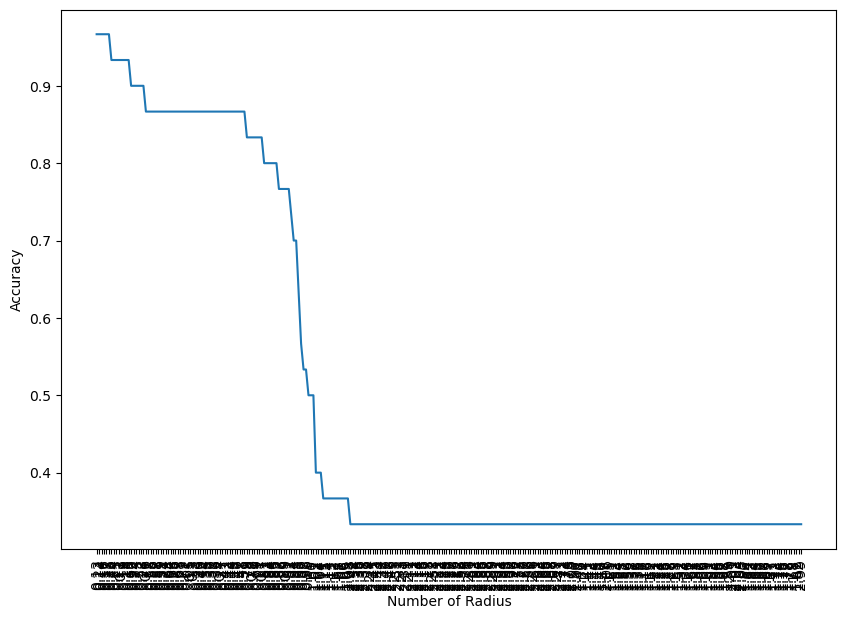

In [53]:
plt.figure(figsize = (10, 7))

plt.plot(df_radios["accuracy"])

plt.ylabel("Accuracy")
plt.xlabel("Number of Radius")

plt.xticks(ticks = range(len(df_radios["radio"])), labels = np.round(df_radios["radio"], 2), rotation = 90)

plt.show()

In [39]:
mejor_indice = np.argmax(df_radios["accuracy"])
mejor_indice

0

In [54]:
df_radios.loc[mejor_indice, ["radio", "accuracy"]]

# (radio, accuracy)

radio       0.130000
accuracy    0.966667
Name: 0, dtype: float64

### **Ejercicio 1:**
- Utiliza el dataset del titanic para practicar **RadiusNeighbors**

In [5]:
df = pd.read_csv(filepath_or_buffer = "../Data/titanic_preprocesamiento.csv")

X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

# Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# MinMaxScaler
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

X_train: (710, 13), y_train: (710,)
X_test: (178, 13), y_test: (178,)


In [6]:
rnn = RadiusNeighborsClassifier()

rnn.fit(X_train, y_train)

yhat_rnn = rnn.predict(X_test)

accuracy_rnn = accuracy_score(y_test, yhat_rnn)

print(accuracy_rnn)

0.8033707865168539
